# Nairobi Hospital Hypothyroidism Test

## 1. Defining the Question

### a) Specifying the Question

To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid

### b) Defining the Metric for Success


To get a model that can have the highest level of prediction of above 90%

### c) Understanding the context

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

Accurate thyroid function tests are available to diagnose hypothyroidism. Treatment with synthetic thyroid hormone is usually simple, safe and effective once you and your doctor find the right dose for you.

Hypothyroidism signs and symptoms may include:

* Fatigue
* Increased sensitivity to cold
* Constipation
* Dry skin
* Weight gain
* Puffy face
* Hoarseness
* Muscle weakness
* Elevated blood cholesterol level
* Muscle aches, tenderness and stiffness
* Pain, stiffness or swelling in your joints
* Heavier than normal or irregular menstrual periods
* Thinning hair
* Slowed heart rate
* Depression
* Impaired memory
* Enlarged thyroid gland (goiter)

### d). Recording the Experimental Design

We will use exploratory data analysis, such as Univariate, Bivariate, in this study to determine the relationships and differences between different variables. We shall also use Decision Trees and Support Vector Machine to make predictions.

### e) Data Relevance

The dataset to use for this project can be found by following this link: https://bit.ly/hypothyroid_data

Below are the features of the dataset

* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4

## 2. Reading the Data

In [67]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)



In [68]:
# Let's read the dataset

url = 'https://bit.ly/hypothyroid_data'

hypothyroid_data = pd.read_csv(url)

## 3. Checking the Data

In [69]:
# Checking the top data

hypothyroid_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [70]:
# Checking the columns

hypothyroid_data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [71]:
# Checking the shape

hypothyroid_data.shape

(3163, 26)

The dataset contains 26 columns and 3163 rows.

In [72]:
# Describing the data

hypothyroid_data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


## 4. Tidying the Dataset

### a). Checking for Null Values

In [73]:
# Replacing the '?' character in the dataframe with NAN

hypothyroid_data.replace('?', np.nan, inplace=True)

In [74]:
total = hypothyroid_data.isnull().sum().sort_values(ascending=False)
percentage = (hypothyroid_data.isnull().sum()/hypothyroid_data.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
TBG,2903,91.779956
T3,695,21.972811
TSH,468,14.796080
age,446,14.100537
TT4,249,7.872273
T4U,248,7.840658
FTI,247,7.809042
sex,73,2.307936
TSH_measured,0,0.000000
TBG_measured,0,0.000000


Since tbg column has 91% missing we shall drop it

In [75]:
hypothyroid_data.drop('TBG', axis=1, inplace=True)

We shall also drop the other missing values since the data is medical data, it must only contain actual information

In [76]:
hypothyroid_data.dropna(inplace=True)

In [77]:
# Confirming there is no missing data

hypothyroid_data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

### b). Checking for Duplicates

In [78]:
hypothyroid_data.duplicated().sum()

54

There are 77 duplicated values and we shall proceed to remove them

In [79]:
hypothyroid_data.drop_duplicates(keep='first',inplace=True)

In [80]:
# Confirming they have been removed

hypothyroid_data.duplicated().sum()

0

### c). Columns Formatting 

In [81]:
# For consistency  the columns should be uniform
# We shall be changing all column names to lower case
#
hypothyroid_data.columns = hypothyroid_data.columns.str.lower()

# Previewing the columns 

hypothyroid_data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

### d). Checking the Datatypes

In [82]:
hypothyroid_data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
tbg_measured                 object
dtype: object

In [83]:
# Changing column datatypes to their appriopriate datatypes
# Lists of numerical, categorical and bool columns have been created for efficiency
# Numerical columns list
#
numeric_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

# Categorical columns list
categorical_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',
            't4u_measured', 'fti_measured', 'tbg_measured']

# Boolean columns list
booleen_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True or False value
#
for column in booleen_cols:
  hypothyroid_data[column] = hypothyroid_data[column].replace('f', False)
  hypothyroid_data[column] = hypothyroid_data[column].replace('t', True)
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in hypothyroid_data.columns:
  if column in numeric_cols:
    hypothyroid_data[column] = hypothyroid_data[column].astype('float64')
  elif column in categorical_cols:
    hypothyroid_data[column] = hypothyroid_data[column].astype('category')
  elif column in booleen_cols:
    hypothyroid_data[column] = hypothyroid_data[column].astype('bool')
  
# Previewing the column datatypes to check whether the changes have been effected
#
hypothyroid_data.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
dtype: object

### e). Checking for Outliers

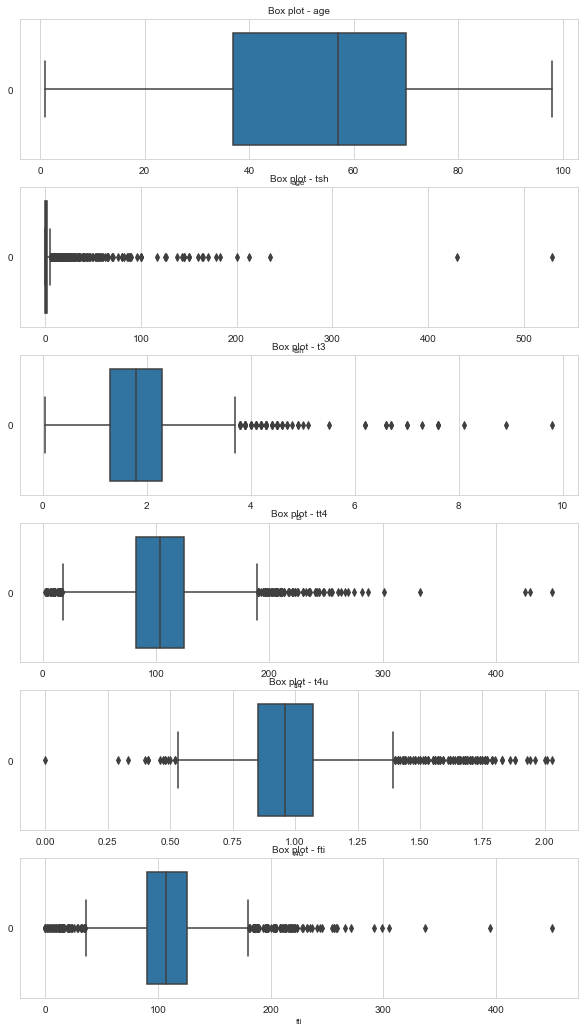

In [84]:
# Plotting columns with numerical values only to check for outliers

fig, ax = plt.subplots(len(numeric_cols), figsize= (10,18))

for i, col_val in enumerate(numeric_cols):
  sns.boxplot(data = hypothyroid_data[col_val], ax= ax[i], orient="h")
  hypothyroid_data[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

Since this is a medical dataset. Outliers represent real values, hence we cannot remove them.

## 5. Exploratory Data Analysis(EDA)

### a) Univariate Analysis

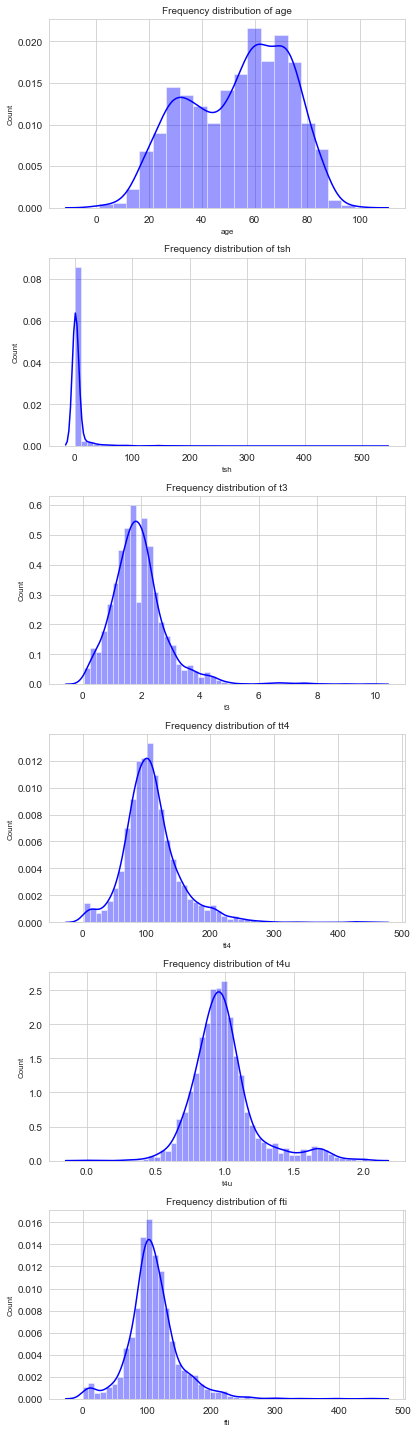

In [85]:
# Plotting distribution of numerical variables

fig, ax = plt.subplots(len(numeric_cols), figsize=(6,20))

for i, col_val in enumerate(numeric_cols):

    sns.distplot(hypothyroid_data[col_val], hist=True, ax=ax[i], color='b', label='Distribution')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

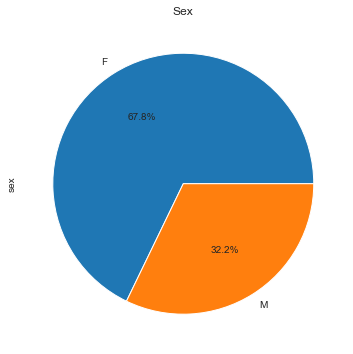

In [86]:
# Pie chart to show the sex

hypothyroid_data.sex.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (6, 6))
plt.title('Sex')
plt.show()

From the above piechart, we can see that more than two thirds of all cases are female.

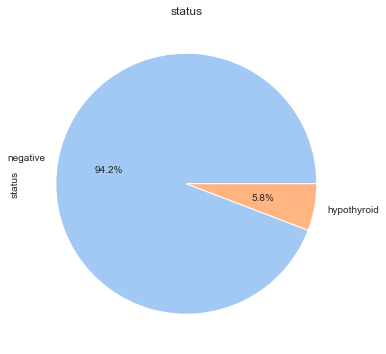

In [87]:
# Pie chart to show the status

colors = sns.color_palette('pastel')[0:5]

hypothyroid_data.status.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (6, 6), colors=colors)
plt.title('status')
plt.show()

We can easily that we have close to 6% cases of hypothroid

### b). Bivariate Analysis

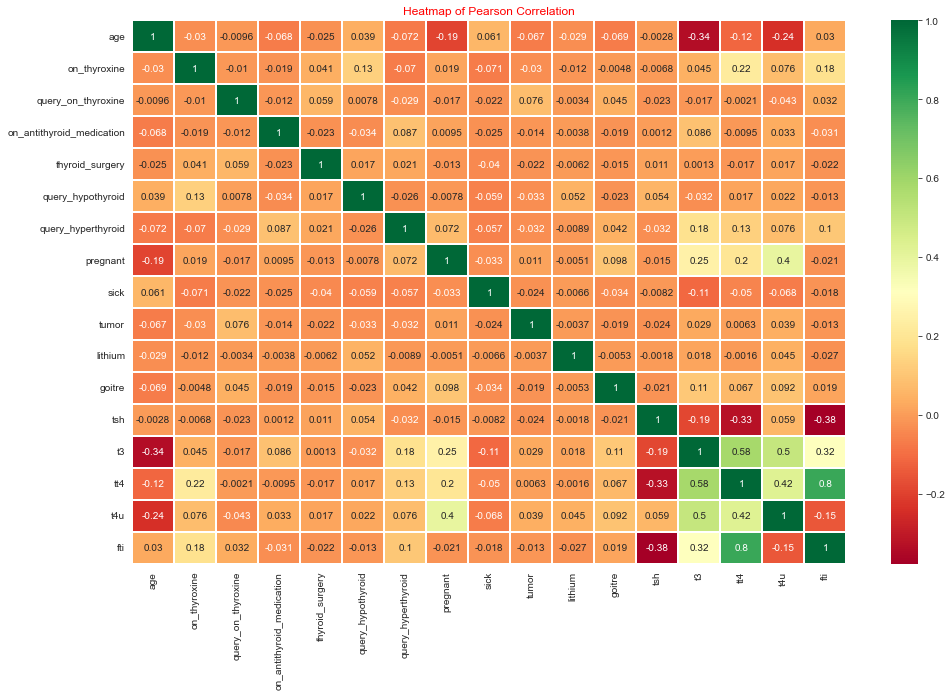

In [88]:
# Checking the Pearson's correlation

sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(hypothyroid_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('Heatmap of Pearson Correlation', color='red')
plt.show()

## 6. Implementing the Solution

### a). Feature Engineering

In [89]:
# Selecting categorical variables 
 
categorical_cols = hypothyroid_data.select_dtypes(include=['category','bool']).columns

categorical_cols

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured',
       'fti_measured', 'tbg_measured'],
      dtype='object')

In [90]:
# We shall use LabelEncoder to encode the categorical variables

le = LabelEncoder()

hypothyroid_data[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured',
       'fti_measured', 'tbg_measured']] = hypothyroid_data[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured',
       'fti_measured', 'tbg_measured']].apply(le.fit_transform)

In [91]:
hypothyroid_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0


### b). Random Forest

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [92]:
# Creating our independent and dependent variables

X = hypothyroid_data.drop(['status'], axis=1)
y = hypothyroid_data['status']

features = X.columns

In [93]:
# Splitting the data into training and test sets using 70% of the data for training and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [94]:
# Using the RandomForestClassifier to train the data

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train, y_train)

In [95]:
# Predicting the results

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,584.000000,584.000000
mean,0.938356,0.938356
std,0.240714,0.240714
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


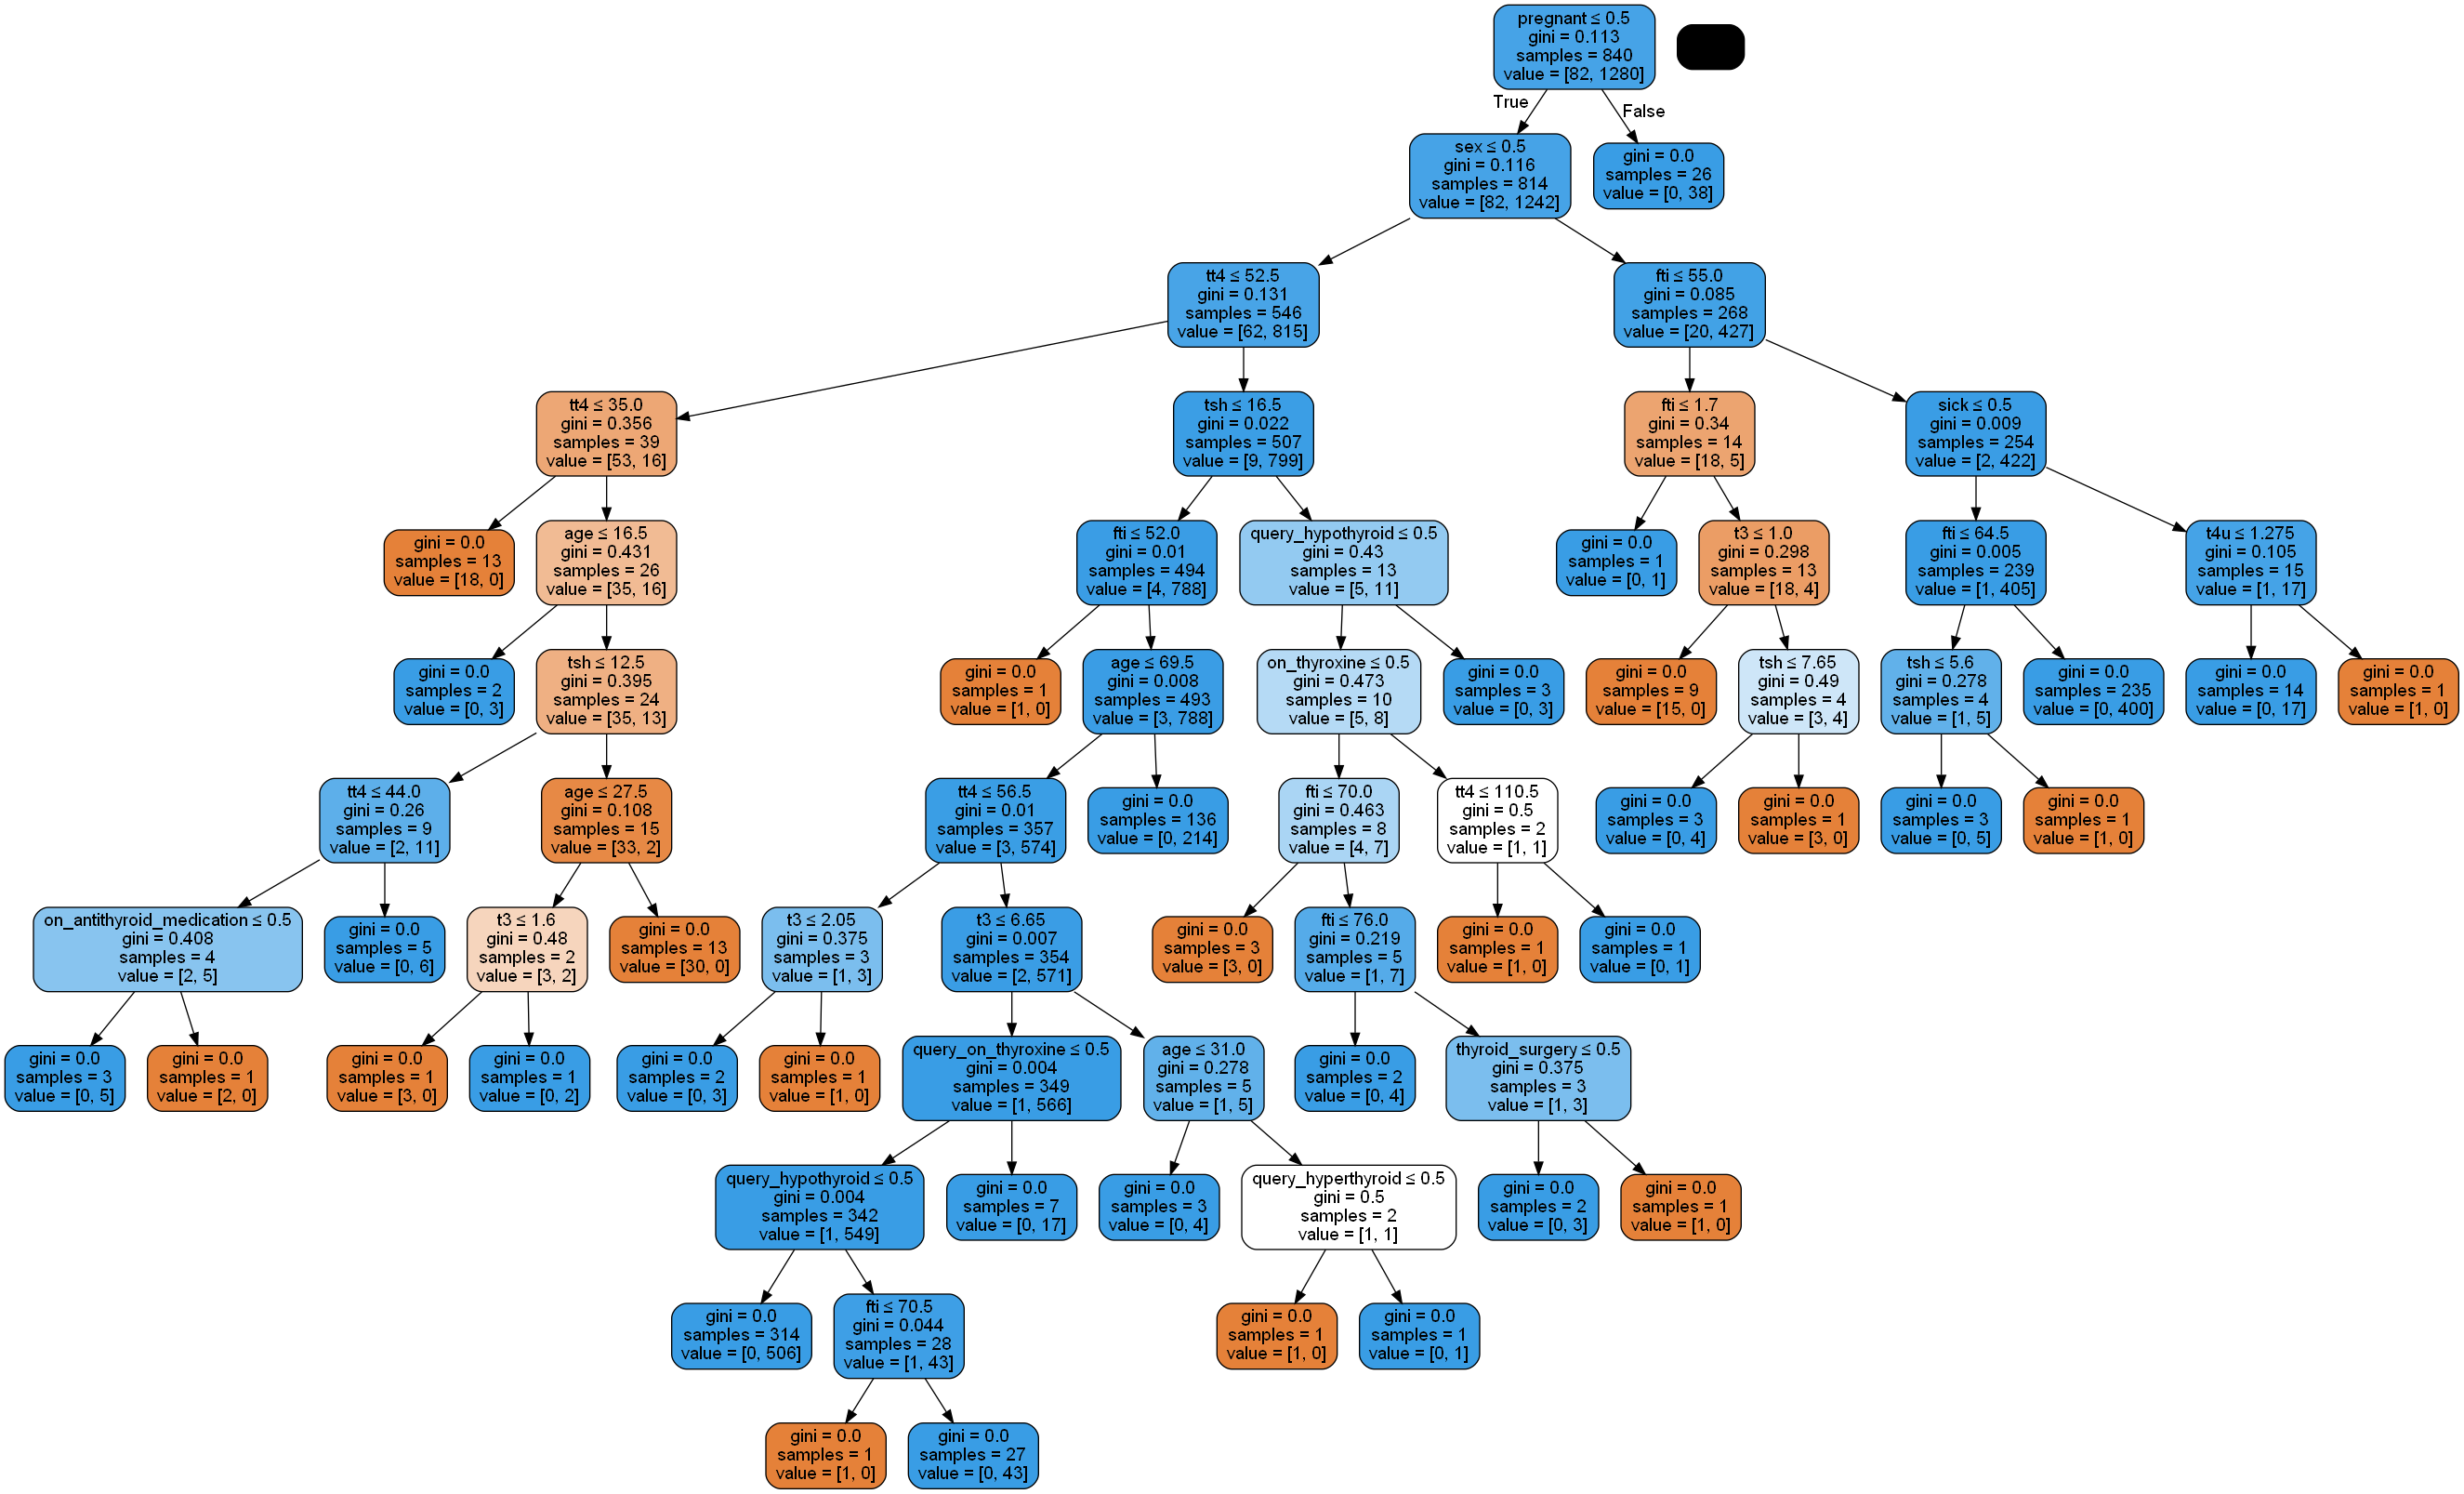

In [96]:
# Visualizing the results

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('randomforest.png')
Image(graph.create_png())

In [97]:
# Evaluating the model

print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:  [[ 33   3]
 [  3 545]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.99      0.99      0.99       548

    accuracy                           0.99       584
   macro avg       0.96      0.96      0.96       584
weighted avg       0.99      0.99      0.99       584



The model has an f1-score of 99%, which makes it a good model for the dataset.

In [98]:
# Increasing the number of estimators

forest = RandomForestClassifier(n_estimators=500)
forest = forest.fit(X_train, y_train)

In [99]:
# Predicting the results

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,584.000000,584.000000
mean,0.938356,0.938356
std,0.240714,0.240714
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [100]:
# Evaluating the model

print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:  [[ 33   3]
 [  3 545]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.99      0.99      0.99       548

    accuracy                           0.99       584
   macro avg       0.96      0.96      0.96       584
weighted avg       0.99      0.99      0.99       584



The accuracy reduces slightly. With the increase on the number of estimators, it does not affect the accuracy that much.

### c). Gradient Boosting

Gradient boosting re-defines boosting as a numerical optimisation problem where the objective is to minimise the loss function of the model by adding weak learners using gradient descent. Gradient descent is a first-order iterative optimisation algorithm for finding a local minimum of a differentiable function.

In [101]:
# Creating our independent and dependent variables

X = hypothyroid_data.drop(['status'], axis=1)
y = hypothyroid_data['status']

In [102]:
# Splitting the data into training and test sets using 70% of the data for training and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
# Using the Gradient Boosting GradientBoostingClassifier with 300 trees

from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

In [104]:
# Predicting the results

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,584.000000,584.000000
mean,0.950342,0.938356
std,0.217423,0.240714
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [105]:
# Testing using different learning rate will help in determine the optimal value for this case
list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in list:
    gb_classifier = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_classifier.fit(X_train, y_train)

    print("Learning Rate: ", learning_rate)

    print("Accuracy score (training): {0:.3f}".format(gb_classifier.score(X_train, y_train)))
    
    print("Accuracy score (test): {0:.3f}".format(gb_classifier.score(X_test, y_test)))

Learning Rate:  0.05
Accuracy score (training): 0.940
Accuracy score (test): 0.952
Learning Rate:  0.075
Accuracy score (training): 0.957
Accuracy score (test): 0.961
Learning Rate:  0.1
Accuracy score (training): 0.966
Accuracy score (test): 0.964
Learning Rate:  0.25
Accuracy score (training): 0.980
Accuracy score (test): 0.973
Learning Rate:  0.5
Accuracy score (training): 0.986
Accuracy score (test): 0.974
Learning Rate:  0.75
Accuracy score (training): 0.993
Accuracy score (test): 0.979
Learning Rate:  1
Accuracy score (training): 0.965
Accuracy score (test): 0.969


The best learning rate is at 0.75 which gives us a best score of 99.5%

In [106]:
# Evaluating the model

print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:  [[  1  28]
 [ 35 520]]
              precision    recall  f1-score   support

           0       0.03      0.03      0.03        29
           1       0.95      0.94      0.94       555

    accuracy                           0.89       584
   macro avg       0.49      0.49      0.49       584
weighted avg       0.90      0.89      0.90       584



### d). Support Vector Machine(SVM)

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. We shall first do Feature Importance to determine the important columns.

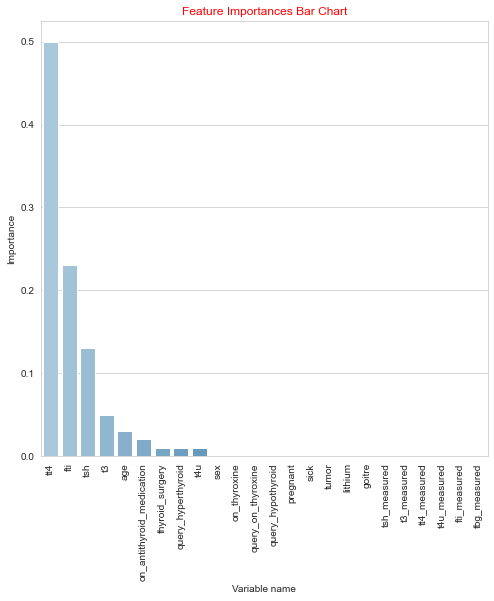

In [107]:
# Feature importance

importances = tree.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

# PLotting the feature importance

x_value = pd.DataFrame(feature_importances)
x_value

plt.figure(figsize=(8,8))
sns.barplot(x =0, y = 1, data=x_value, palette="Blues_d")
plt.xlabel('Variable name')
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature Importances Bar Chart', color='red')
plt.show()

tsh is the most important feature to consider in relation to hypothyroidism.

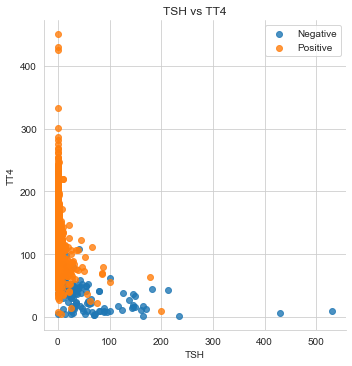

In [108]:
# Visualizing the tsh vs tt4

sns.lmplot(x='tsh', y='tt4', data=hypothyroid_data, fit_reg=False, hue='status', legend=False)
plt.legend(loc='upper right', labels=['Negative', 'Positive'])
plt.title('TSH vs TT4')
plt.xlabel('TSH')
plt.ylabel('TT4')
plt.show()

#### i). Linear Kernel

In [109]:
#Fitting the model using a linear function
# split the data into x and y
X = hypothyroid_data[['tt4', 't4u', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = hypothyroid_data['status']

# standardizing the data
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

X = preprocessing.normalize(X)

# Splitting the data into training data and testing data. We will train using 70% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# fitting the model into the data

model = SVC(kernel='linear')
  
lin_model = model.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Confusion matrix:  [[ 20  16]
 [  2 546]]
              precision    recall  f1-score   support

           0       0.91      0.56      0.69        36
           1       0.97      1.00      0.98       548

    accuracy                           0.97       584
   macro avg       0.94      0.78      0.84       584
weighted avg       0.97      0.97      0.97       584



The Linear Model has a f1-score of 97%, which implies the model is good.

#### ii). Polynomial Model

In [110]:
# fitting the model on to the data
X = hypothyroid_data[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = hypothyroid_data['status']

# standardizing the data

scaler = StandardScaler()

scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model 

poly = SVC(kernel='poly',degree=3, gamma='scale')

# Training the model using the training set

poly.fit(X_train, y_train)
#making prediction
y_pred = poly.predict(X_test)

# Evaluating the model

print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:  [[ 23   5]
 [  2 360]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.99      0.99      0.99       362

    accuracy                           0.98       390
   macro avg       0.95      0.91      0.93       390
weighted avg       0.98      0.98      0.98       390



The model has also 98%, it is also a good model

#### iii). Radial Basis Function (rbf) model

In [111]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', C=1, gamma=0.1)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [112]:
# Predicting the results

y_pred_rbf = rbfclassifier.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

comparison_frame.describe()

,Actual,Predicted
count,390.000000,390.0
mean,0.928205,1.0
std,0.258480,0.0
min,0.000000,1.0
25%,1.000000,1.0
50%,1.000000,1.0
75%,1.000000,1.0
max,1.000000,1.0


In [113]:
# Evaluating the model

print('Confusion matrix: ', confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

Confusion matrix:  [[  0  28]
 [  0 362]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.93      1.00      0.96       362

    accuracy                           0.93       390
   macro avg       0.46      0.50      0.48       390
weighted avg       0.86      0.93      0.89       390



The model has an accuracy level of 93.6%. THis may not be the best model for this dataset with the set hyperparameters

In [50]:
# Tuning the Hyperparameters

#Increasing the C value

c_value = [1, 5, 10, 50, 100]

for c_param in c_value:
    rbfclassifier = SVC(kernel='rbf', C=c_param, gamma=0.1)
    # Training the model using the training set
    rbfclassifier.fit(X_train, y_train)
    
    print("C value: ", c_param)
    print("Accuracy score (training): {0:.3f}".format(rbfclassifier.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(rbfclassifier.score(X_test, y_test)))

C value:  1
Accuracy score (training): 0.944
Accuracy score (test): 0.943
C value:  5
Accuracy score (training): 0.958
Accuracy score (test): 0.969
C value:  10
Accuracy score (training): 0.960
Accuracy score (test): 0.969
C value:  50
Accuracy score (training): 0.961
Accuracy score (test): 0.969
C value:  100
Accuracy score (training): 0.962
Accuracy score (test): 0.971


With increase in the C value, the accuracy score slightly improves the model

In [51]:
# Increasing the gamma value

gamma = [0.1, 0.5, 1, 5, 10]


for gamma_param in gamma:
    # Building the model 
    rbfclassifier = SVC(kernel='rbf', C=1, gamma=gamma_param)
    # Training the model using the training set
    rbfclassifier.fit(X_train, y_train)
    
    print("Gamma value: ", gamma_param)
    print("Accuracy score (training): {0:.3f}".format(rbfclassifier.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(rbfclassifier.score(X_test, y_test)))

Gamma value:  0.1
Accuracy score (training): 0.944
Accuracy score (test): 0.943
Gamma value:  0.5
Accuracy score (training): 0.960
Accuracy score (test): 0.969
Gamma value:  1
Accuracy score (training): 0.961
Accuracy score (test): 0.969
Gamma value:  5
Accuracy score (training): 0.963
Accuracy score (test): 0.969
Gamma value:  10
Accuracy score (training): 0.964
Accuracy score (test): 0.969


There is a slight improvement with the increase on the gamma value but which is significant.

#### SVM Model Comparison

The best model for this dataset is the Polynomial, with an accuracy score of 98%. We shall therefore proceed to tune the
hyperparameters.

In [116]:
# fitting the model on to the data
X = hypothyroid_data[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = hypothyroid_data['status']

# standardizing the data

scaler = StandardScaler()

scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

degree = [1, 2, 3, 4, 5]

for degree_param in degree:
    # Building the model 
    poly = SVC(kernel='poly',degree=degree_param, gamma='scale', C=1, coef0=1)
    # Training the model using the training set
    poly.fit(X_train, y_train)
    
    print("Degree value: ", degree_param)
    print("Accuracy score (training): {0:.3f}".format(poly.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(poly.score(X_test, y_test)))

Degree value:  1
Accuracy score (training): 0.972
Accuracy score (test): 0.985
Degree value:  2
Accuracy score (training): 0.979
Accuracy score (test): 0.979
Degree value:  3
Accuracy score (training): 0.981
Accuracy score (test): 0.982
Degree value:  4
Accuracy score (training): 0.984
Accuracy score (test): 0.990
Degree value:  5
Accuracy score (training): 0.985
Accuracy score (test): 0.987


We can clearly see the model performs best with the increase of degree value at C value of 1 and coefficient value of 1

## 7. Conclusion

From our dataset we can clearly see that the data is not balance since we have more females than males. However all our models passed the initial metric of success of an accuracy level of above 90%, which implies that we can make good predictions. We can also conclude that the models are not overfitting since the performance of the model on the training dataset is not significantly better than the performance on the test dataset.

## 8. Follow up questions

### a) Did we have the right data?

Yes, the dataset available for this analysis was relevant to the research problem.

### b) Do we need other data to answer the research question?

No, the dataset contained relevant information for the research question.

### c) Did we have the right question?

Yes, the research question was simple and specific.